<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.781076,47.672599,33.425988,64.805510,-0.000685,209.684488,209.685725,-0.001238
1,0.0,1.0,46.546392,85.658985,27.635211,69.457833,0.001145,239.299566,239.298307,0.001259
2,0.0,2.0,94.239197,32.762800,63.710046,60.237658,0.000908,260.950609,260.951053,-0.000444
3,0.0,3.0,38.213919,87.393387,20.475002,34.968302,-0.000279,191.050332,191.050234,0.000098
4,0.0,4.0,23.292204,84.443131,92.107239,36.039110,-0.000149,245.881536,245.880807,0.000729
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.508084,30.579195,61.058751,36.333415,0.004646,193.484090,193.480294,0.003796
29996,999.0,26.0,72.432152,57.475031,96.458061,80.587931,0.000550,316.953726,316.954620,-0.000894
29997,999.0,27.0,65.180592,64.314077,31.576895,74.478037,-0.000553,245.549048,245.549573,-0.000525
29998,999.0,28.0,43.378685,87.102886,67.702758,44.282346,0.000875,252.467550,252.467010,0.000540


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.781076  47.672599  33.425988  64.805510 -0.000685  209.684488   
      1.0    46.546392  85.658985  27.635211  69.457833  0.001145  239.299566   
      2.0    94.239197  32.762800  63.710046  60.237658  0.000908  260.950609   
      3.0    38.213919  87.393387  20.475002  34.968302 -0.000279  191.050332   
      4.0    23.292204  84.443131  92.107239  36.039110 -0.000149  245.881536   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   55.508084  30.579195  61.058751  36.333415  0.004646  193.484090   
      26.0   72.432152  57.475031  96.458061  80.587931  0.000550  316.953726   
      27.0   65.180592  64.314077  31.576895  74.478037 -0.000553  245.549048   
      28.0   43.378685  87.102886  67.702758  44.282346  0.000875  252.467550   
      29.0   67.814798  39.489076  41.353629  43.551622  0.000732  202.209857   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    209.685725 -0.001238  
      1.0    239.298307  0.001259  
      2.0    260.951053 -0.000444  
      3.0    191.050234  0.000098  
      4.0    245.880807  0.000729  
...                 ...       ...  
999.0 25.0   193.480294  0.003796  
      26.0   316.954620 -0.000894  
      27.0   245.549573 -0.000525  
      28.0   252.467010  0.000540  
      29.0   202.209440  0.000417  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.781076  47.672599  33.425988  64.805510 -0.000685  209.684488   
      1.0    46.546392  85.658985  27.635211  69.457833  0.001145  239.299566   
      2.0    94.239197  32.762800  63.710046  60.237658  0.000908  260.950609   
      3.0    38.213919  87.393387  20.475002  34.968302 -0.000279  191.050332   
      4.0    23.292204  84.443131  92.107239  36.039110 -0.000149  245.881536   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   55.508084  30.579195  61.058751  36.333415  0.004646  193.484090   
      26.0   72.432152  57.475031  96.458061  80.587931  0.000550  316.953726   
      27.0   65.180592  64.314077  31.576895  74.478037 -0.000553  245.549048   
      28.0   43.378685  87.102886  67.702758  44.282346  0.000875  252.467550   
      29.0   67.814798  39.489076  41.353629  43.551622  0.000732  202.209857   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    209.685725 -0.001238  
      1.0    239.298307  0.001259  
      2.0    260.951053 -0.000444  
      3.0    191.050234  0.000098  
      4.0    245.880807  0.000729  
...                 ...       ...  
999.0 25.0   193.480294  0.003796  
      26.0   316.954620 -0.000894  
      27.0   245.549573 -0.000525  
      28.0   252.467010  0.000540  
      29.0   202.209440  0.000417  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.781076,47.672599,33.425988,64.805510,-0.000685,209.684488,209.685725,-0.001238
1,0.0,1.0,46.546392,85.658985,27.635211,69.457833,0.001145,239.299566,239.298307,0.001259
2,0.0,2.0,94.239197,32.762800,63.710046,60.237658,0.000908,260.950609,260.951053,-0.000444
3,0.0,3.0,38.213919,87.393387,20.475002,34.968302,-0.000279,191.050332,191.050234,0.000098
4,0.0,4.0,23.292204,84.443131,92.107239,36.039110,-0.000149,245.881536,245.880807,0.000729
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.508084,30.579195,61.058751,36.333415,0.004646,193.484090,193.480294,0.003796
29996,999.0,26.0,72.432152,57.475031,96.458061,80.587931,0.000550,316.953726,316.954620,-0.000894
29997,999.0,27.0,65.180592,64.314077,31.576895,74.478037,-0.000553,245.549048,245.549573,-0.000525
29998,999.0,28.0,43.378685,87.102886,67.702758,44.282346,0.000875,252.467550,252.467010,0.000540


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.781076  47.672599  33.425988  64.805510 -0.000685  209.684488   
      1.0    46.546392  85.658985  27.635211  69.457833  0.001145  239.299566   
      2.0    94.239197  32.762800  63.710046  60.237658  0.000908  260.950609   
      3.0    38.213919  87.393387  20.475002  34.968302 -0.000279  191.050332   
      4.0    23.292204  84.443131  92.107239  36.039110 -0.000149  245.881536   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   55.508084  30.579195  61.058751  36.333415  0.004646  193.484090   
      26.0   72.432152  57.475031  96.458061  80.587931  0.000550  316.953726   
      27.0   65.180592  64.314077  31.576895  74.478037 -0.000553  245.549048   
      28.0   43.378685  87.102886  67.702758  44.282346  0.000875  252.467550   
      29.0   67.814798  39.489076  41.353629  43.551622  0.000732  202.209857   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    209.685725 -0.001238  
      1.0    239.298307  0.001259  
      2.0    260.951053 -0.000444  
      3.0    191.050234  0.000098  
      4.0    245.880807  0.000729  
...                 ...       ...  
999.0 25.0   193.480294  0.003796  
      26.0   316.954620 -0.000894  
      27.0   245.549573 -0.000525  
      28.0   252.467010  0.000540  
      29.0   202.209440  0.000417  

[30000 rows x 8 columns]

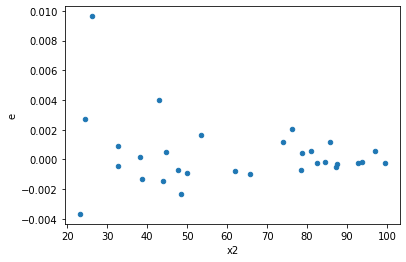

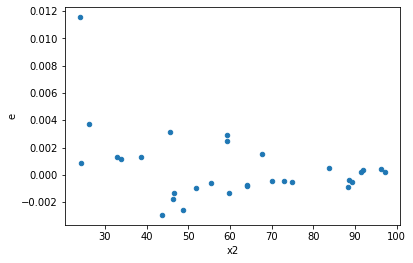

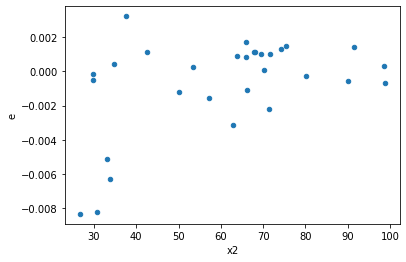

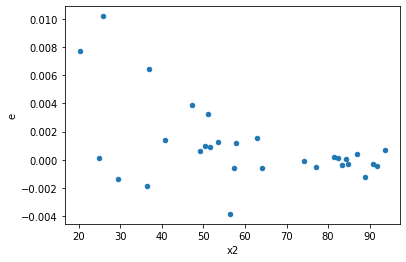

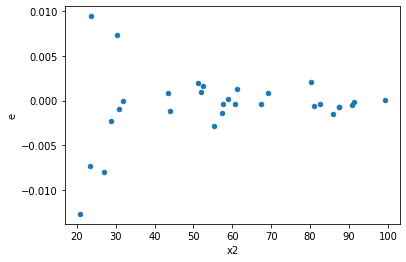

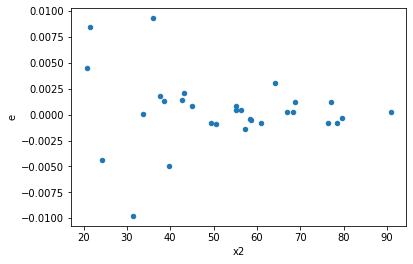

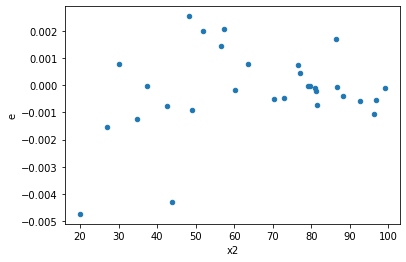

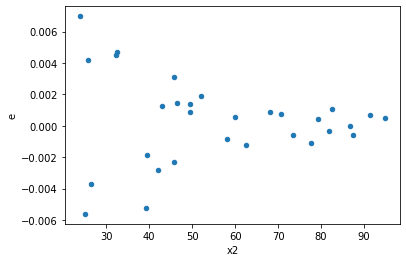

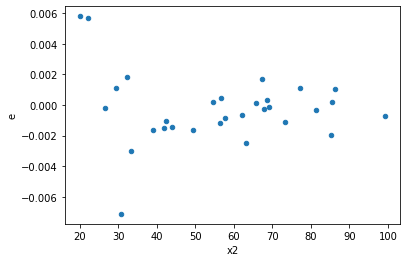

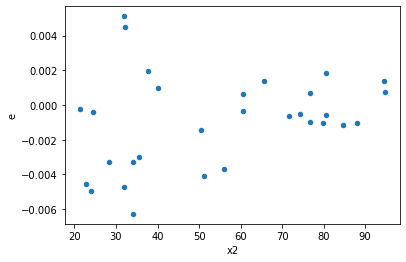

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,16.0,6.0,1.4403104742660587e-05,9.319642038588523e-05,9.001940464162867e-07,1.553273673098087e-05,17.254876093457185,0.0020645661122509207,0.9989677169438745,0.0010322830561254603,Reject001=0 : Heteroscedasticity
1.0,12.0,10.0,2.99841873387822e-05,8.839862654563143e-05,2.49868227823185e-06,8.839862654563144e-06,3.53780980142002,0.05400618606198715,0.9729969069690064,0.027003093030993575,Reject001=1 : Homoscedasticity
4.0,15.0,7.0,0.00021429842450183448,0.00014051100342855045,1.4286561633455632e-05,2.007300048979292e-05,1.4050266960516844,0.6729321424625576,0.6635339287687212,0.3364660712312788,Reject001=1 : Homoscedasticity
8.0,9.0,13.0,1.6885148517326104e-05,0.0001151039176928726,1.8761276130362338e-06,8.854147514836355e-06,4.719373806618215,0.012140770494878161,0.9939296147525609,0.006070385247439081,Reject001=1 : Homoscedasticity
10.0,8.0,14.0,1.4575143674277223e-05,0.00010295805965279622,1.8218929592846529e-06,7.354147118056873e-06,4.036541817991547,0.022222816230544007,0.988888591884728,0.011111408115272003,Reject001=1 : Homoscedasticity
11.0,10.0,12.0,1.9100411575109904e-05,0.00019253269446315937,1.9100411575109905e-06,1.604439120526328e-05,8.40002381214184,0.0010200561883111359,0.9994899719058444,0.0005100280941555679,Reject001=0 : Heteroscedasticity
12.0,1.0,21.0,7.81944172804034e-25,0.0001818382210746775,7.81944172804034e-25,8.658962908317975e-06,1.1073633143485336e+19,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
13.0,16.0,6.0,7.346181851013535e-05,0.0001108007746643713,4.59136365688346e-06,1.8466795777395218e-05,4.022072124413287,0.09435636994671492,0.9528218150266425,0.04717818497335746,Reject001=1 : Homoscedasticity
14.0,12.0,10.0,0.00012832530387066587,0.00014912617307342643,1.0693775322555488e-05,1.4912617307342644e-05,1.3945138042959162,0.606962210766345,0.6965188946168275,0.3034811053831725,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,16.0,6.0,1.4403104742660587e-05,9.319642038588523e-05,9.001940464162867e-07,1.553273673098087e-05,17.254876093457185,0.0020645661122509207,Reject001=0 : Heteroscedasticity
1.0,12.0,10.0,2.99841873387822e-05,8.839862654563143e-05,2.49868227823185e-06,8.839862654563144e-06,3.53780980142002,0.05400618606198715,Reject001=1 : Homoscedasticity
2.0,12.0,10.0,5.138330581079941e-05,3.158469132242754e-05,4.281942150899951e-06,3.1584691322427543e-06,0.7376253627291364,0.609250633231699,Reject001=1 : Homoscedasticity
3.0,9.0,13.0,0.00010368811108488217,8.275973505457627e-06,1.1520901231653573e-05,6.366133465736636e-07,0.05525725234277455,0.000144048809226486,Reject001=0 : Heteroscedasticity
4.0,15.0,7.0,0.00021429842450183448,0.00014051100342855045,1.4286561633455632e-05,2.007300048979292e-05,1.4050266960516844,0.6729321424625576,Reject001=1 : Homoscedasticity
5.0,13.0,9.0,0.00031723284049365,6.7644757408620244e-06,2.4402526191819234e-05,7.51608415651336e-07,0.030800434747747844,3.603220764012036e-07,Reject001=0 : Heteroscedasticity
6.0,16.0,6.0,3.720307194343795e-05,4.230620417368914e-06,2.325191996464872e-06,7.051034028948189e-07,0.30324523908856976,0.05246604275282118,Reject001=1 : Homoscedasticity
7.0,13.0,9.0,9.373160682246035e-05,2.8087680546600214e-05,7.210123601727719e-06,3.1208533940666905e-06,0.4328432585148553,0.16546964213103718,Reject001=1 : Homoscedasticity
8.0,9.0,13.0,1.6885148517326104e-05,0.0001151039176928726,1.8761276130362338e-06,8.854147514836355e-06,4.719373806618215,0.012140770494878161,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      584
Reject001=0 : Heteroscedasticity    416
Name: Result_test, dtype: int64